In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [75]:
data=pd.read_csv("loan_data 1.csv")
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
print("Dataset Dimensions: ",data.shape)

Dataset Dimensions:  (307511, 122)


In [77]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [78]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [79]:
data.isna().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [80]:
null_data = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
null_data.columns = ['Column Name', 'Null Values Percentage']
null_data_sorted = null_data.sort_values(by='Null Values Percentage', ascending=False)
null_data_sorted

,Column Name,Null Values Percentage
76,COMMONAREA_MEDI,69.872297
48,COMMONAREA_AVG,69.872297
62,COMMONAREA_MODE,69.872297
70,NONLIVINGAPARTMENTS_MODE,69.432963
56,NONLIVINGAPARTMENTS_AVG,69.432963
...,...,...
15,NAME_HOUSING_TYPE,0.000000
14,NAME_FAMILY_STATUS,0.000000
13,NAME_EDUCATION_TYPE,0.000000
12,NAME_INCOME_TYPE,0.000000


From the above dataframe we can see that there are many columns in which percentage of null values is more than 40% so we have to solve this problem

In [81]:
null_col_40= null_data[null_data['Null Values Percentage']>=40]
null_col_40

,Column Name,Null Values Percentage
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
46,YEARS_BEGINEXPLUATATION_AVG,48.781019
47,YEARS_BUILD_AVG,66.497784
48,COMMONAREA_AVG,69.872297
49,ELEVATORS_AVG,53.295980
50,ENTRANCES_AVG,50.348768
51,FLOORSMAX_AVG,49.760822


In [82]:
len(null_col_40)

49

Total of 49 columns are there which have more than 40% null values.Seems like most of the columns with high missing values are related to different area sizes on apartment owned/rented by the loan applicant

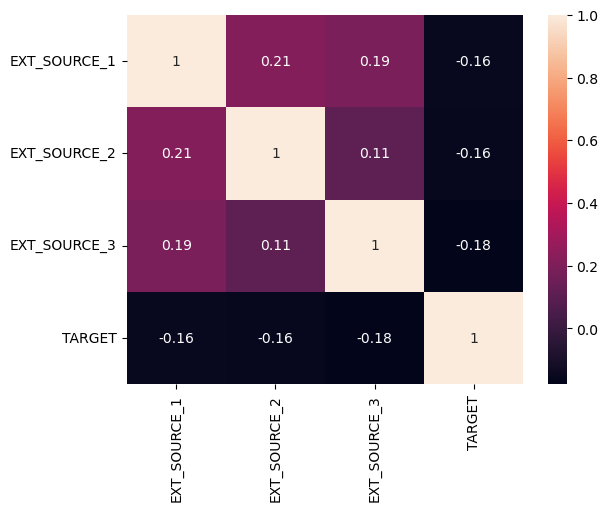

In [83]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Source = data[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True)

In [84]:
Source.isna().mean()*100

EXT_SOURCE_1    56.381073
EXT_SOURCE_2     0.214626
EXT_SOURCE_3    19.825307
TARGET           0.000000
dtype: float64

Based on the above Heatmap, we can see there is almost no correlation between EXT_SOURCE_X columns and target column, thus we can drop these columns. EXT_SOURCE_1 has 56% null values, where as EXT_SOURCE_3 has close to 20% null values

In [85]:
# create a list of columns that needs to be dropped including the columns with >40% null values
Unwanted_data = null_col_40["Column Name"].tolist()+ ['EXT_SOURCE_2','EXT_SOURCE_3'] 
# as EXT_SOURCE_1 column is already included in null_col_40 
len(Unwanted_data)

51

C:\Users\peyush.jindal\AppData\Local\Temp\ipykernel_25880\1764705455.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter",0:"Repayer"})


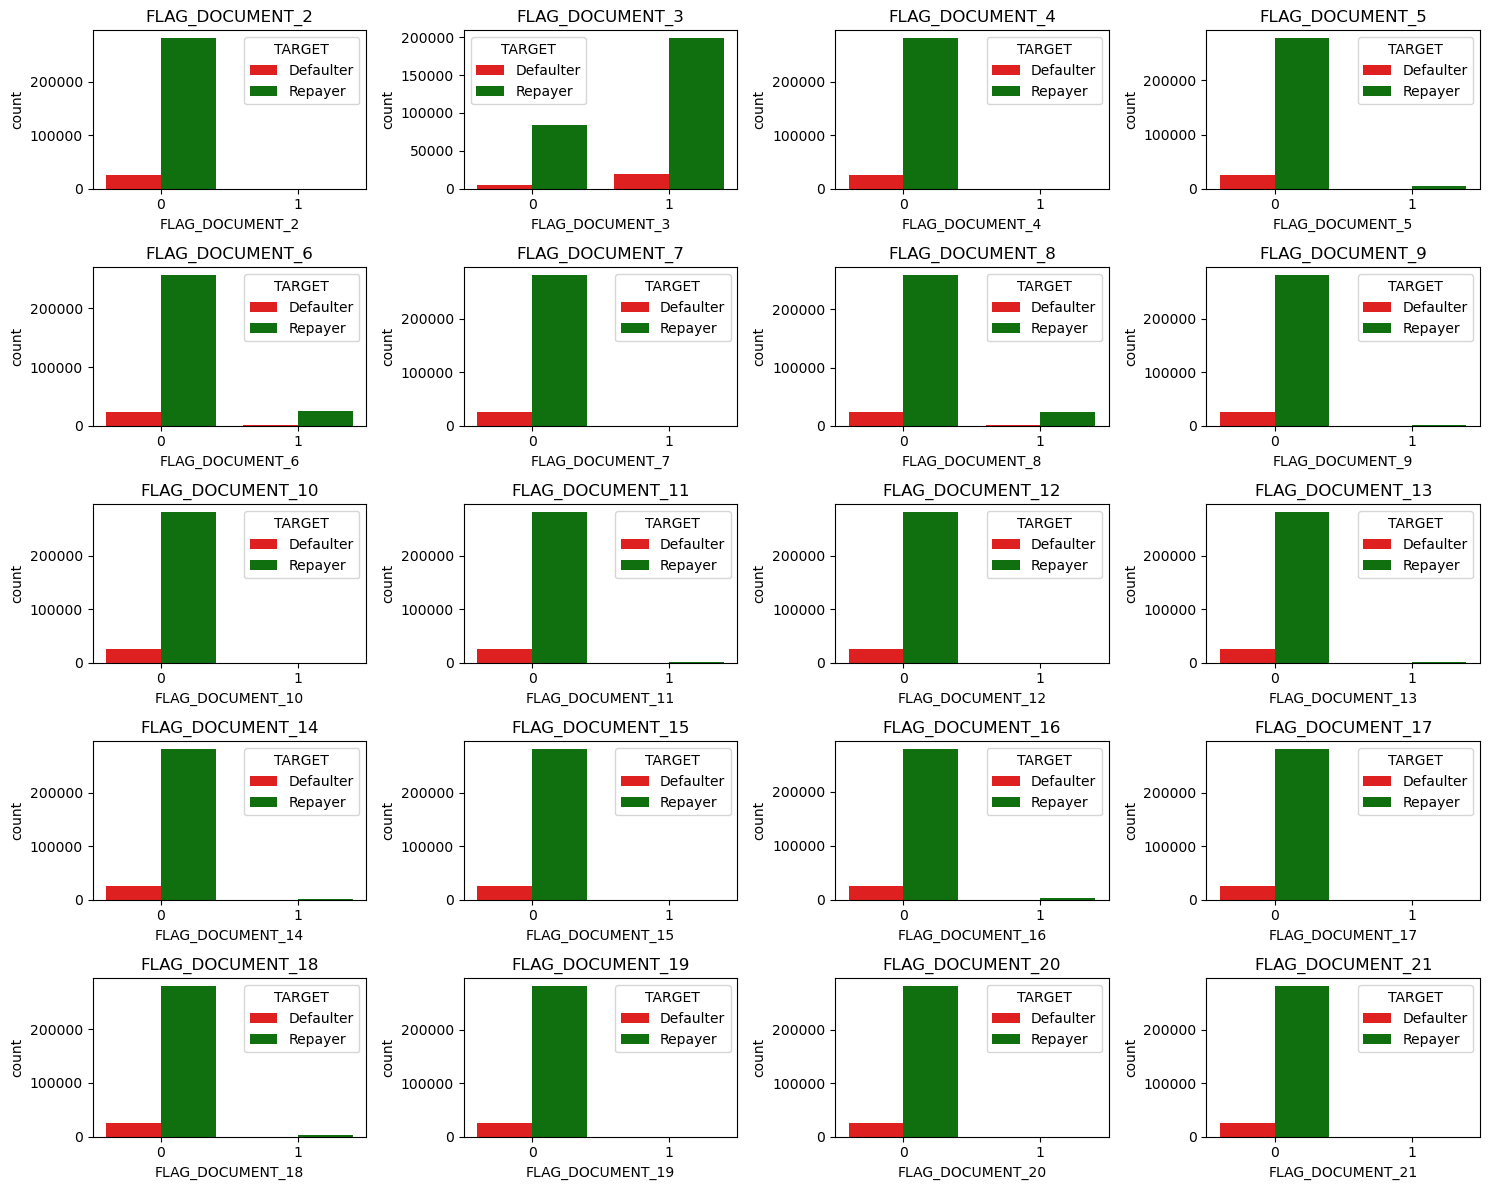

In [86]:
# Checking the relevance of Flag_Document and whether it has any relation with loan repayment status
col_Doc = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df_flag = data[col_Doc+["TARGET"]]

length = len(col_Doc)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter",0:"Repayer"})

length = len(col_Doc)
num_rows = 5
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

for i, ax in zip(col_Doc, axes.flatten()):
    sns.countplot(data=df_flag, x=i, hue="TARGET", palette=["r", "g"], ax=ax)
    ax.set_title(i)

plt.tight_layout()
plt.show()

The above graph shows that in most of the loan application cases, clients who applied for loans has not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns. Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.

In [87]:
# Including the flag documents for dropping the Document columns
col_Doc.remove('FLAG_DOCUMENT_3') 
Unwanted_data = Unwanted_data + col_Doc
len(Unwanted_data)

70

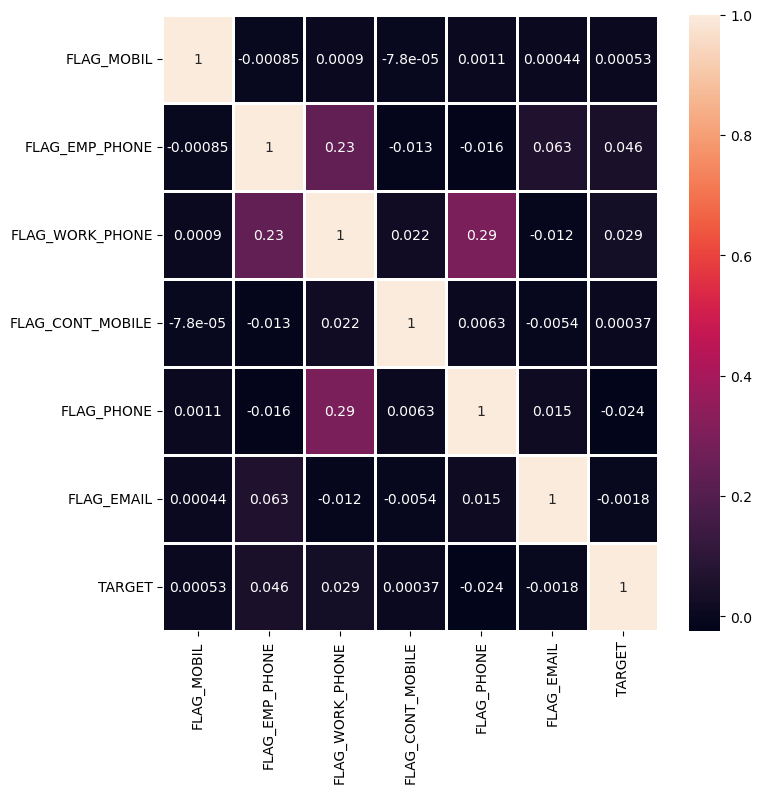

In [88]:
# checking is there is any correlation between mobile phone, work phone etc, email, Family members and Region rating
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = data[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            linewidth=1)

There is no correlation between flags of mobile phone, email etc with loan repayment; thus these columns can be deleted

In [89]:
# including the 6 FLAG columns to be deleted
contact_col.remove('TARGET') 
Unwanted_data = Unwanted_data + contact_col
len(Unwanted_data)

76

In [90]:
data.drop(columns=Unwanted_data,axis=1,inplace=True)

In [91]:
data.shape

(307511, 46)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [93]:
# Converting Negative days to positive days

date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in date_col:
    data[col] = abs(data[col])

In [94]:
# Binning Numerical Columns to create a categorical column

# Creating bins for income amount
data['AMT_INCOME_TOTAL']=data['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

data['AMT_INCOME_RANGE']=pd.cut(data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [95]:
data['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

AMT_INCOME_RANGE
100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: proportion, dtype: float64

More than 50% loan applicants have income amount in the range of 100K-200K. Almost 92% loan applicants have income less than 300K

In [96]:
# Creating bins for Credit amount
data['AMT_CREDIT']=data['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

data['AMT_CREDIT_RANGE']=pd.cut(data['AMT_CREDIT'],bins=bins,labels=slots)

In [97]:
#checking the binning of data and % of data in each category
data['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

AMT_CREDIT_RANGE
200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: proportion, dtype: float64

More Than 16% loan applicants have taken loan which amounts to more than 1M.

In [98]:
# Creating bins for Age
data['AGE'] = data['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

data['AGE_GROUP']=pd.cut(data['AGE'],bins=bins,labels=slots)

In [99]:
(data['AGE'].value_counts()).sort_index(ascending=False)

AGE
69      16
68     866
67    2042
66    2085
65    3113
64    5117
63    5197
62    5514
61    5418
60    6227
59    6631
58    6268
57    6768
56    6828
55    6637
54    7551
53    7457
52    6763
51    6689
50    6482
49    6627
48    6984
47    7018
46    7293
45    7205
44    7819
43    8308
42    8216
41    8449
40    8624
39    8770
38    8873
37    8799
36    8614
35    7804
34    7631
33    7714
32    7911
31    8377
30    7806
29    7670
28    7975
27    8476
26    4561
25    4168
24    3905
23    4057
22    2933
21    1254
20       1
Name: count, dtype: int64

In [100]:
#checking the binning of data and % of data in each category
data['AGE_GROUP'].value_counts(normalize=True)*100

AGE_GROUP
50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: proportion, dtype: float64

31% loan applicants have age above 50 years. More than 55% of loan applicants have age over 40 years.

In [101]:
# Creating bins for Employement Time
data['YEARS_EMPLOYED'] = data['DAYS_EMPLOYED'] // 365
bins = [-1,5,10,20,30,40,50]
slots = ['0-5','5-10','10-20','20-30','30-40','40 above']

data['EMPLOYMENT_YEAR']=pd.cut(data['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [102]:
(data['YEARS_EMPLOYED'].value_counts(normalize=True)).sort_index(ascending=True)

YEARS_EMPLOYED
0       0.090741
1       0.103544
2       0.096413
3       0.081646
4       0.070784
5       0.052912
6       0.048945
7       0.042756
8       0.037202
9       0.029202
10      0.023947
11      0.019193
12      0.017264
13      0.014143
14      0.015099
15      0.008861
16      0.007593
17      0.006523
18      0.006237
19      0.006084
20      0.005203
21      0.004751
22      0.004075
23      0.003304
24      0.002972
25      0.002670
26      0.002124
27      0.002133
28      0.001987
29      0.001844
30      0.001486
31      0.001421
32      0.001141
33      0.001076
34      0.001184
35      0.000836
36      0.000637
37      0.000449
38      0.000377
39      0.000406
40      0.000192
41      0.000192
42      0.000137
43      0.000062
44      0.000101
45      0.000046
46      0.000013
47      0.000003
48      0.000013
49      0.000003
1000    0.180072
Name: proportion, dtype: float64

In [103]:
#checking the binning of data and % of data in each category
data['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

EMPLOYMENT_YEAR
0-5         60.498063
5-10        22.203405
10-20       12.952482
20-30        3.335092
30-40        0.941552
40 above     0.069407
Name: proportion, dtype: float64

More than 60% of the loan applicants have work experience within 0-5 years and almost 82% of them have less than 10 years of work experience

In [104]:
#Checking the number of unique values each column possess to identify categorical columns
data.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_3                     2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
AGE_GROUP                           5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EMPLOYMENT_YEAR                     6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_S

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [106]:
#Conversion of Object and Numerical columns to Categorical Columns
# categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
#                        'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
#                        'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
#                        'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
#                        'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
#                        'REGION_RATING_CLIENT_W_CITY'
#                       ]
# for col in categorical_columns:
#     data[col] =pd.Categorical(data[col])

In [107]:
# data.info()

Strategy for applicationDF:

To impute null values in categorical variables which has lower null percentage, mode() is used to impute the most frequent items.

To impute null values in categorical variables which has higher null percentage, a new category is created.

To impute null values in numerical variables which has lower null percentage, median() is used as:

There are no outliers in the columns

Mean returned decimal values and median returned whole numbers and the columns were number of requests

In [108]:
data.isna().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CL

In [109]:
data['NAME_TYPE_SUITE'].value_counts(normalize=True)*100

NAME_TYPE_SUITE
Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: proportion, dtype: float64

In [110]:
data['NAME_TYPE_SUITE'].fillna((data['NAME_TYPE_SUITE'].mode()[0]),inplace = True)
#Impute categorical variable 'NAME_TYPE_SUITE' which has lower null percentage(0.42%) with the most frequent category

In [112]:
#Impute categorical variable 'OCCUPATION_TYPE' which has higher null percentage(31.35%) with a new category as assigning to any existing category might influence the analysis
data['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

In [113]:
data['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [114]:
#Impute numerical variables with the median as there are no outliers that can be seen from results of describe() and mean() returns decimal values and these columns represent number of enquiries made which cannot be decimal
data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [115]:
amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in amount:
    data[col].fillna(data[col].median(),inplace = True)

In [116]:
(data.isna().mean()*100).sort_values(ascending=False)

EMPLOYMENT_YEAR                18.007161
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
AMT_GOODS_PRICE                 0.090403
AMT_INCOME_RANGE                0.075444
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_3                 0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
AMT_REQ_CREDIT_BUREAU_DAY       0.000000
AMT_REQ_CREDIT_BUREAU_HOUR      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
AMT_REQ_CREDIT_BUREAU_WEEK      0.000000
AMT_REQ_CREDIT_BUREAU_MON       0.000000
AMT_REQ_CREDIT_BUREAU_QRT       0.000000
AMT_REQ_CREDIT_BUREAU_YEAR      0.000000
AMT_CREDIT_RANGE                0.000000
AGE                             0.000000
AGE_GROUP       

In [117]:
data_bin=pd.DataFrame(data[["AMT_INCOME_RANGE","AMT_CREDIT_RANGE","AGE_GROUP","EMPLOYMENT_YEAR"]])
data_bin

,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE_GROUP,EMPLOYMENT_YEAR
0,200k-300k,400k-500k,20-30,0-5
1,200k-300k,1M Above,40-50,0-5
2,0-100K,100K-200K,50 above,0-5
3,100K-200K,300k-400k,50 above,5-10
4,100K-200K,500k-600k,50 above,5-10
...,...,...,...,...
307506,100K-200K,200k-300k,20-30,0-5
307507,0-100K,200k-300k,50 above,NaN
307508,100K-200K,600k-700k,40-50,20-30
307509,100K-200K,300k-400k,30-40,10-20


In [118]:
data.drop(columns=["AMT_INCOME_RANGE","AMT_CREDIT_RANGE","AGE_GROUP","EMPLOYMENT_YEAR","AGE","YEARS_EMPLOYED"],inplace=True)

In [119]:
data['AMT_INCOME_TOTAL']=data['AMT_INCOME_TOTAL']*100000
data['DAYS_BIRTH']=data['AMT_CREDIT']*100000

In [120]:
data.shape

(307511, 46)

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [122]:
data[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_GOODS_PRICE', 'AMT_ANNUITY' ,'CNT_FAM_MEMBERS' , 'DAYS_LAST_PHONE_CHANGE'  ]].dtypes

OBS_30_CNT_SOCIAL_CIRCLE    float64
DEF_30_CNT_SOCIAL_CIRCLE    float64
OBS_60_CNT_SOCIAL_CIRCLE    float64
DEF_60_CNT_SOCIAL_CIRCLE    float64
AMT_GOODS_PRICE             float64
AMT_ANNUITY                 float64
CNT_FAM_MEMBERS             float64
DAYS_LAST_PHONE_CHANGE      float64
dtype: object

In [123]:
cols=['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_GOODS_PRICE', 'AMT_ANNUITY' ,'CNT_FAM_MEMBERS' , 'DAYS_LAST_PHONE_CHANGE'  ]
for col in cols:
    data[col].fillna(data[col].median(), inplace=True)

In [124]:
(data.isna().mean()*100).sort_values(ascending=False)

SK_ID_CURR                     0.0
OBS_30_CNT_SOCIAL_CIRCLE       0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
ORGANIZATION_TYPE              0.0
DEF_30_CNT_SOCIAL_CIRCLE       0.0
TARGET                         0.0
OBS_60_CNT_SOCIAL_CIRCLE       0.0
DEF_60_CNT_SOCIAL_CIRCLE       0.0
DAYS_LAST_PHONE_CHANGE         0.0
FLAG_DOCUMENT_3                0.0
AMT_REQ_CREDIT_BUREAU_HOUR     0.0
AMT_REQ_CREDIT_BUREAU_DAY      0.0
AMT_REQ_CREDIT_BUREAU_WEEK     0.0
AMT_REQ_CREDIT_BUREAU_MON      0.0
AMT_REQ_CREDIT_BUREAU_QRT      0.0
REGION_RATING_CLIENT_W_CITY    0.0
REGION_RATING_CLIENT           0.0
CNT_FAM_MEMBERS                0.0
OCCUPATION_TYPE                0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR        

In [125]:
data.shape

(307511, 46)

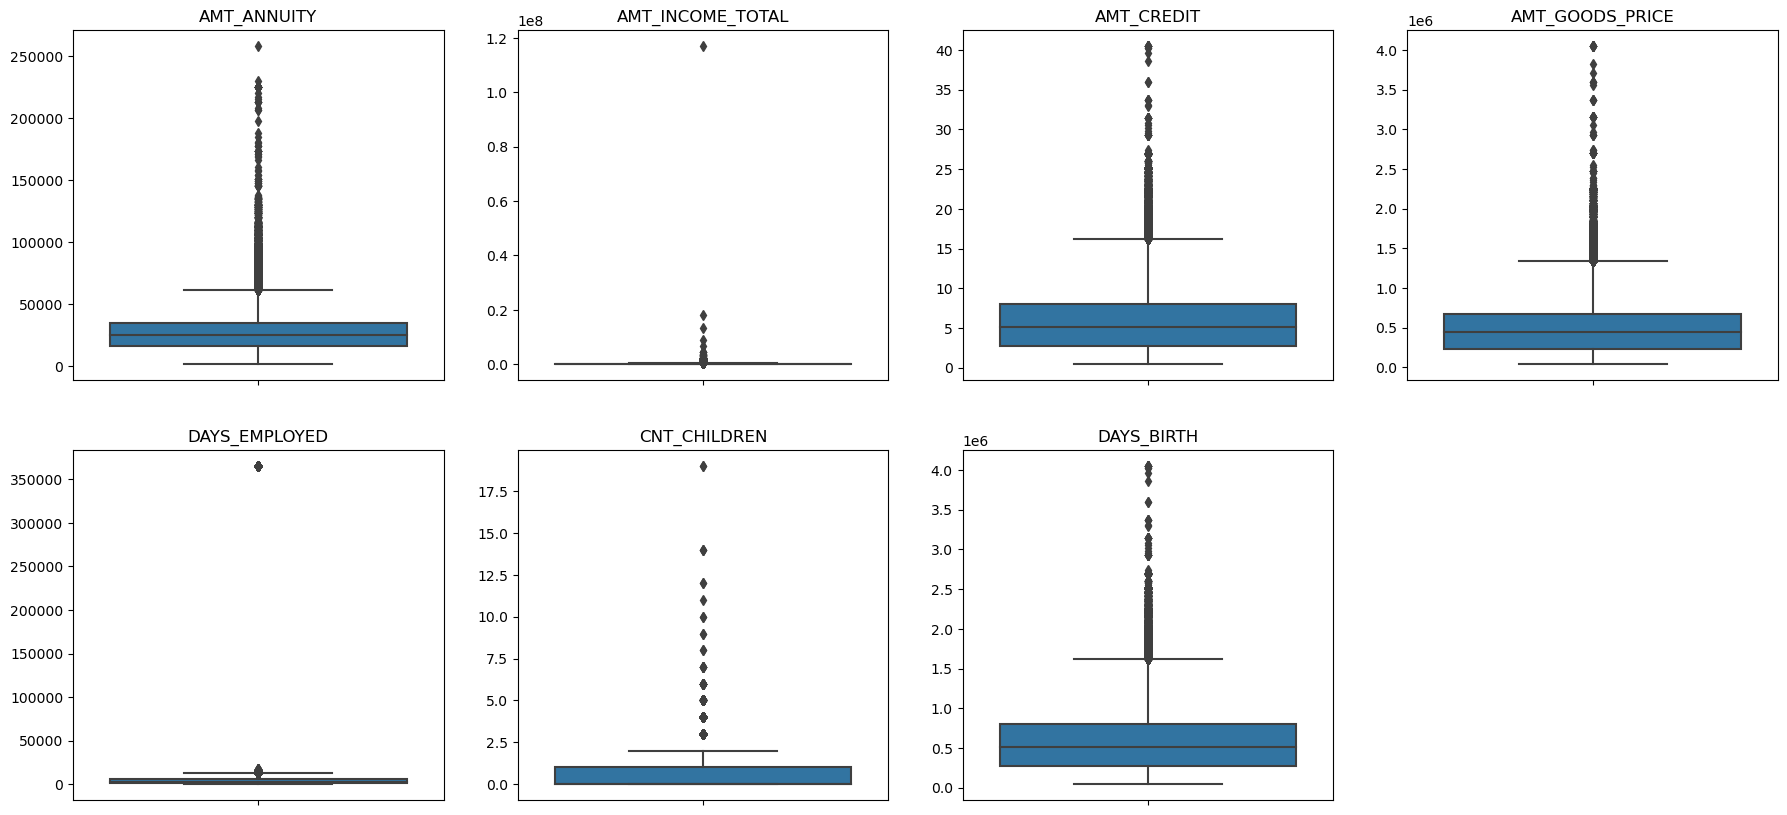

In [126]:
plt.figure(figsize=(22,10))

data_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
data_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(data_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(data_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

In [127]:
data[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,CNT_CHILDREN,DAYS_EMPLOYED
count,307511.000000,3.075110e+05,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000
mean,27108.487841,1.687979e+05,5.990260,5.383163e+05,5.990260e+05,0.417052,67724.742149
std,14493.461065,2.371231e+05,4.024908,3.692890e+05,4.024908e+05,0.722121,139443.751806
min,1615.500000,2.565000e+04,0.450000,4.050000e+04,4.500000e+04,0.000000,0.000000
25%,16524.000000,1.125000e+05,2.700000,2.385000e+05,2.700000e+05,0.000000,933.000000
50%,24903.000000,1.471500e+05,5.135310,4.500000e+05,5.135310e+05,0.000000,2219.000000
75%,34596.000000,2.025000e+05,8.086500,6.795000e+05,8.086500e+05,1.000000,5707.000000
max,258025.500000,1.170000e+08,40.500000,4.050000e+06,4.050000e+06,19.000000,365243.000000


It can be seen that in current application data

AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.

AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.

DAYS_BIRTH has no outliers which means the data available is reliable.

DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.

In [130]:
categorical_columns=data.select_dtypes(include='object')

In [131]:
categorical_columns.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [132]:
categorical_dict={}
for col in categorical_columns.columns:
    categorical_dict[col]=data[col].value_counts()
    
print(categorical_dict)

{'NAME_CONTRACT_TYPE': NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64, 'CODE_GENDER': CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64, 'FLAG_OWN_CAR': FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64, 'FLAG_OWN_REALTY': FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64, 'NAME_TYPE_SUITE': NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64, 'NAME_INCOME_TYPE': NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64, 'NAME_EDUCATION_TYPE': NAME_EDUCATION_TYPE
Secondary / second

In [133]:
new_df=pd.DataFrame()
for col in categorical_columns.columns:
    value_counts = data[col].value_counts(normalize=True)
 
    other_categories = value_counts[value_counts < 0.02].index
 
    # Replace those categories with 'other'
    new_df[col] = data[col].apply(lambda x: 'Other' if x in other_categories else x)
    print("col",col," \n ->",new_df[col].unique(),"\n ---> ",data[col].unique(),"\n")

col NAME_CONTRACT_TYPE  
 -> ['Cash loans' 'Revolving loans'] 
 --->  ['Cash loans' 'Revolving loans'] 

col CODE_GENDER  
 -> ['M' 'F' 'Other'] 
 --->  ['M' 'F' 'XNA'] 

col FLAG_OWN_CAR  
 -> ['N' 'Y'] 
 --->  ['N' 'Y'] 

col FLAG_OWN_REALTY  
 -> ['Y' 'N'] 
 --->  ['Y' 'N'] 

col NAME_TYPE_SUITE  
 -> ['Unaccompanied' 'Family' 'Spouse, partner' 'Other'] 
 --->  ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people'] 

col NAME_INCOME_TYPE  
 -> ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Other'] 
 --->  ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave'] 

col NAME_EDUCATION_TYPE  
 -> ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Other'] 
 --->  ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree'] 

col NAME_FAMILY_STATUS  
 -> ['Single / not married' 'Married' 'Civil marriag

In [134]:
categorical_dict_2={}
for col in categorical_columns.columns:
    categorical_dict_2[col]=new_df[col].value_counts()
    
print(categorical_dict_2)

{'NAME_CONTRACT_TYPE': NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64, 'CODE_GENDER': CODE_GENDER
F        202448
M        105059
Other         4
Name: count, dtype: int64, 'FLAG_OWN_CAR': FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64, 'FLAG_OWN_REALTY': FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64, 'NAME_TYPE_SUITE': NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Other                6174
Name: count, dtype: int64, 'NAME_INCOME_TYPE': NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Other                       55
Name: count, dtype: int64, 'NAME_EDUCATION_TYPE': NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Other                              3980
Name: count, dtype: int

In [135]:
data[['LIVE_CITY_NOT_WORK_CITY','REG_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY','LIVE_REGION_NOT_WORK_REGION','REG_REGION_NOT_WORK_REGION']]=data[['LIVE_CITY_NOT_WORK_CITY','REG_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY','LIVE_REGION_NOT_WORK_REGION','REG_REGION_NOT_WORK_REGION']].replace({"0":0,"1":1})

In [136]:
data[['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']]=data[['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']].replace({"1":1,"2":2,"3":3})

In [137]:
data[['FLAG_OWN_CAR','FLAG_OWN_REALTY']]=data[['FLAG_OWN_CAR','FLAG_OWN_REALTY']].replace({"N":0,"Y":1})

In [138]:
from sklearn.preprocessing import OrdinalEncoder
oe1=OrdinalEncoder(categories=[['Revolving loans', 'Cash loans']])
data['NAME_CONTRACT_TYPE']=oe1.fit_transform(data[['NAME_CONTRACT_TYPE']])

oe2=OrdinalEncoder(categories=[['F','M','Other']])
data['CODE_GENDER']=oe2.fit_transform(new_df[['CODE_GENDER']])

In [139]:
data['FLAG_OWN_CAR'].dtype

dtype('int64')

In [141]:
data.select_dtypes(include='object').columns

Index(['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [142]:
remaining_cols=['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']

In [143]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
# Fit and transform the data
encoded_data = ohe.fit_transform(new_df[['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']))

# # Concatenate the original dataframe with the encoded dataframe
data_encoded = pd.concat([data, encoded_df], axis=1)

# # Drop the original 'NAME_TYPE_SUITE' column if needed
data_encoded.drop(remaining_cols, axis=1, inplace=True)

c:\Users\peyush.jindal\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [162]:
data.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.904787,0.341669,0.340108,0.693673,0.417052,1.687979e+05,5.990260,27108.487841,...,1.400626,0.099717,-962.858119,0.710023,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.293509,0.474297,0.473746,0.460968,0.722121,2.371231e+05,4.024908,14493.461065,...,2.377224,0.361735,826.807226,0.453752,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,0.450000,1615.500000,...,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000,16524.000000,...,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310,24903.000000,...,0.000000,0.000000,-757.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500,34596.000000,...,2.000000,0.000000,-274.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,1.000000,2.000000,1.000000,1.000000,19.000000,1.170000e+08,40.500000,258025.500000,...,344.000000,24.000000,0.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [144]:
data_encoded

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_XNA
0,100002,1,1.0,1.0,0,1,0,202500.0,4.065975,24700.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,1.0,0.0,0,0,0,270000.0,12.935025,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,100004,0,0.0,1.0,1,1,0,67500.0,1.350000,6750.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,1.0,0.0,0,1,0,135000.0,3.126825,29686.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,1.0,1.0,0,1,0,121500.0,5.130000,21865.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,1.0,1.0,0,0,0,157500.0,2.547000,27558.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
307507,456252,0,1.0,0.0,0,1,0,72000.0,2.695500,12001.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,456253,0,1.0,0.0,0,1,0,153000.0,6.776640,29979.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
307509,456254,1,1.0,0.0,0,1,0,171000.0,3.701070,20205.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [150]:
data_encoded.drop(['SK_ID_CURR'],axis=1,inplace=True)

In [151]:
data_encoded.describe()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_XNA
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,3.075110e+05,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,0.904787,0.341669,0.340108,0.693673,0.417052,1.687979e+05,5.990260,27108.487841,5.383163e+05,...,0.221104,0.021856,0.033833,0.022373,0.036399,0.270748,0.028919,0.124913,0.025466,0.180072
std,0.272419,0.293509,0.474297,0.473746,0.460968,0.722121,2.371231e+05,4.024908,14493.461065,3.692890e+05,...,0.414991,0.146214,0.180799,0.147894,0.187280,0.444347,0.167580,0.330620,0.157535,0.384248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,0.450000,1615.500000,4.050000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000,16524.000000,2.385000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310,24903.000000,4.500000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500,34596.000000,6.795000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,2.000000,1.000000,1.000000,19.000000,1.170000e+08,40.500000,258025.500000,4.050000e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [145]:
data_encoded.select_dtypes(include='category').columns

Index([], dtype='object')

In [159]:
from sklearn.preprocessing import MinMaxScaler
ss=MinMaxScaler()
scaled_data=ss.fit_transform(data_encoded)
scaled_data

array([[1. , 1. , 0.5, ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.5, ..., 0. , 0. , 0. ],
       ...,
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [1. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ]])

In [160]:
scaled_df=pd.DataFrame(scaled_data,columns=data_encoded.columns)
scaled_df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_XNA
0,1.0,1.0,0.5,0.0,1.0,0.0,0.001512,0.090287,0.090032,0.077441,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.002089,0.311736,0.132924,0.271605,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.5,1.0,1.0,0.0,0.000358,0.022472,0.020025,0.023569,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.000935,0.066837,0.109477,0.063973,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.5,0.0,1.0,0.0,0.000819,0.116854,0.078975,0.117845,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,1.0,0.5,0.0,0.0,0.0,0.001127,0.052360,0.101176,0.046016,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
307507,0.0,1.0,0.0,0.0,1.0,0.0,0.000396,0.056067,0.040505,0.046016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,0.0,1.0,0.0,0.0,1.0,0.0,0.001089,0.157969,0.110618,0.135802,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
307509,1.0,1.0,0.0,0.0,1.0,0.0,0.001243,0.081175,0.072499,0.069585,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [167]:
X=scaled_df.iloc[:,1:]
y=scaled_df.iloc[:,0]

In [168]:
X.shape

(307511, 88)

In [169]:
y.shape

(307511,)

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [171]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [175]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [174]:
from sklearn.metrics import confusion_matrix,accuracy_score

y_pred=model.predict(X_test)

cm=confusion_matrix(y_test,y_pred)

print(accuracy_score(y_test,y_pred))

print(cm)

0.9189958213420484
[[56505    49]
 [ 4933    16]]


In [176]:
from sklearn.metrics import confusion_matrix,accuracy_score

y_pred=model.predict(X_test)

cm=confusion_matrix(y_test,y_pred)

print(accuracy_score(y_test,y_pred))

print(cm)

0.9195648992732062
[[56554     0]
 [ 4947     2]]
